In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

In [19]:
def for_num_col(x):
    display(x.hist())
    display(x.describe())
    IQR = x.quantile(0.75) - x.quantile(0.25)
    perc25 = x.quantile(0.25)
    perc75 = x.quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25),'75-й перцентиль: {},'.format(perc75),'IQR: {},'.format(IQR))
    print('Границы выбросов = [{f}, {i}]'.format(f=perc25 - 1.5*IQR, i=perc75 + 1.5*IQR))

In [20]:
def for_obj_col(y):
    x = pd.DataFrame(y.value_counts())
    display(x)
    display(x.plot(kind='bar', grid=True))

In [21]:
display(stud_math.head())
display(stud_math.info())
display(stud_math.index)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

RangeIndex(start=0, stop=395, step=1)

<AxesSubplot:>

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,
Границы выбросов = [13.0, 21.0]


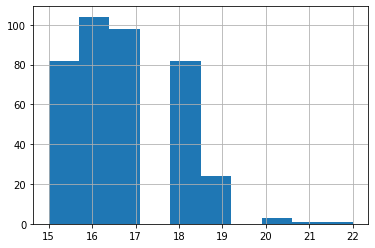

In [22]:
for_num_col(stud_math['age'])

# Столбец возраста:
Пропуски отсутствуют. Основная масса учеников в возрасте от 15 до 18 лет.
Есть незначительное число выбросов: те кто старше 21. Не вижу необходимости их удалять

<AxesSubplot:>

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,
Границы выбросов = [-1.0, 7.0]


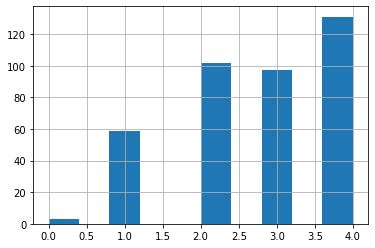

In [23]:
for_num_col(stud_math['Medu'])

# Столбец образования матери:
Есть 3 пропущеных значения. Видно что у большинства учеников матери достаточно образованны. У трети - имеют высшее образвание.
Выбросов и сомнительных значений нет.

<AxesSubplot:>

count    370.000000
mean       2.513514
std        1.087540
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,
Границы выбросов = [0.5, 4.5]


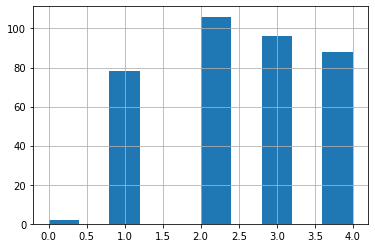

In [24]:
stud_math = stud_math.loc[stud_math['Fedu']<=4]
for_num_col(stud_math['Fedu'])

# Столбец образования отца:
Есть около 20 пропущеных значений. Также есть выбросы, из-за которых на графике сложно детально рассмотреть распределение признака. Необходимо предварительно удалить значения больше 4 и повторно пострить график.
Как видим образованиеу отцов в среднем ниже чем у матерей.

<AxesSubplot:>

count    345.000000
mean       1.449275
std        0.701664
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,
Границы выбросов = [-0.5, 3.5]


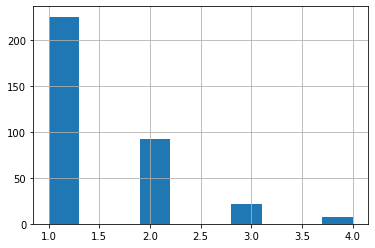

In [25]:
for_num_col(stud_math['traveltime'])

# Столбец времени пути до школы:
Есть около 30 пропусков, что составляет чуть менее 10% от общего количества значений. Не является критичным такое количество пропусков. Исходя из формулы, выбросы присутствуют, однако руководствуясь пояснительной таблицей видим что значения до 4 являются допустимыми, ничего удалять не нужно. В дальнейшем будем считать что выбросов нет если значения в рамках предусмотренных таблицей. По графику видно что большинство детей живет в 15 минутах ходьбы до школы. Дольше часа до школы добираются единицы учеников.

<AxesSubplot:>

count    363.000000
mean       2.027548
std        0.840489
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,
Границы выбросов = [-0.5, 3.5]


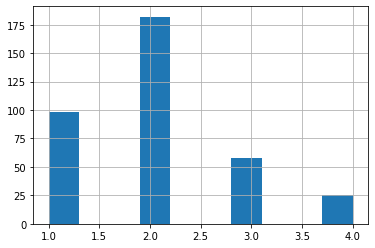

In [26]:
for_num_col(stud_math['studytime'])

# Столбец времени на учебу вне школы в неделю:
Есть немного пропусков. Выбросов нет. Из графика видно что большинство учеников проводят меньше 5 часов в неделю на учебу вне школы, и лишь немногая часть (около 25 человек) - больше 10 часов.

<AxesSubplot:>

count    351.000000
mean       0.336182
std        0.748962
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,
Границы выбросов = [0.0, 0.0]


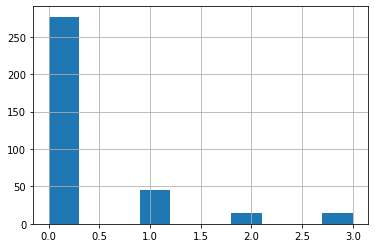

In [27]:
for_num_col(stud_math['failures'])

# Столбец внешкольных неудач:
Есть около 20 пропусков. Выбросов нет. Подавляющее большинство учеников не имеет проблем вне школы.

<AxesSubplot:>

count    363.000000
mean      -6.082645
std        2.521466
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: 3.0,
Границы выбросов = [-10.5, 1.5]


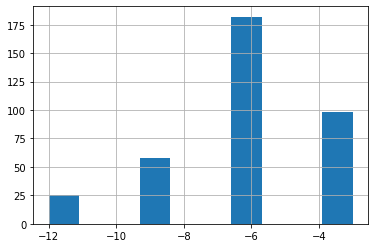

In [28]:
for_num_col(stud_math['studytime, granular'])

<AxesSubplot:>

count    345.000000
mean       3.950725
std        0.902455
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,
Границы выбросов = [2.5, 6.5]


Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,
            ...
            385, 386, 387, 388, 389, 390, 391, 392, 393, 394],
           dtype='int64', length=345)

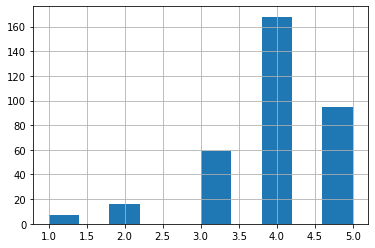

In [29]:
stud_math = stud_math.loc[stud_math['famrel']>=1]
for_num_col(stud_math['famrel'])
display(stud_math.index)

# Столбец отношений внутри семьи:
Присутствуют пропуски (менее 30). Выбросов нет. Как видно у большинства отношения в семье хорошие. Лишь около 10% учеников имеют проблемы внутри семьи.

<AxesSubplot:>

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,
Границы выбросов = [1.5, 5.5]


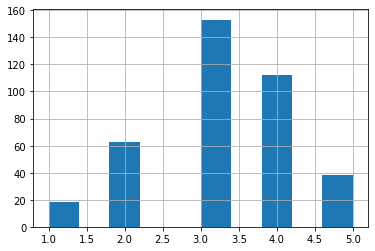

In [24]:
for_num_col(stud_math['freetime'])

# Столбец свободного времени у учеников:
Пропусков мало (около 10). Выбросов нет. В целом средние показатели у большинства учащихся. Лишь у единиц почти нет свободного времени. 

<AxesSubplot:>

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,
Границы выбросов = [-1.0, 7.0]


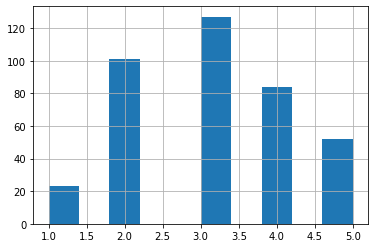

In [25]:
for_num_col(stud_math['goout'])

# Столбец проведения времени с друзьями:
Пропусков мало. Выбросов нет. Опять средние показатели, крайне мало учеников не проводят достаточно времени с друзьями.

<AxesSubplot:>

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,
Границы выбросов = [0.0, 8.0]


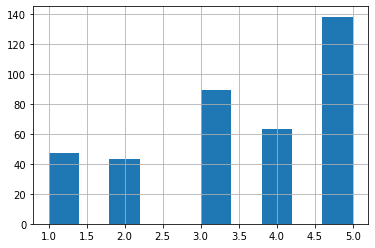

In [26]:
for_num_col(stud_math['health'])

# Столбец здоровья:
Пропусков около 15. Выбросов нет. Больше трети учеников абсолютно здоровы. Явные проблемы со здоровьем примерно у четверти учеников, считаю это многовато. У остальных средние показатели.

<AxesSubplot:>

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,
Границы выбросов = [-12.0, 20.0]


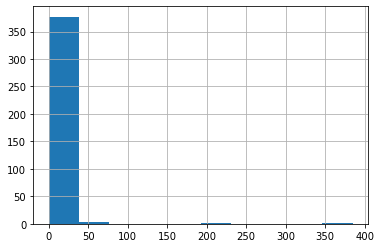

In [27]:
for_num_col(stud_math['absences'])

# Столбец количества пропущенных занятий:
Пропусков в столбце не много, около 10. Есть выбросы - возможно это единичные прогульщики. В основном никто занятия не пропускает, это видно из показателей среднего и медианы по столбцу. Так что этот столбец вряд ли будет полезен в дальнейшем

<AxesSubplot:>

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,
Границы выбросов = [-5.0, 115.0]


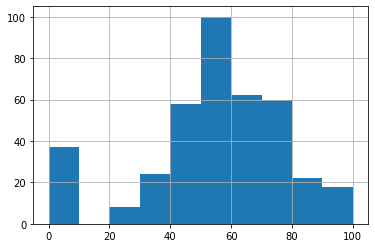

In [28]:
for_num_col(stud_math['score'])

# Столбец набранных баллов по экзамену:
Есть пару пропусков. Выбросов нет. График симметричный. Большинство учеников сдали экзамен средне.

In [33]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.155335,-0.168980,0.066752,-0.033474,0.255513,0.033474,0.063349,0.021524,0.107076,-0.062275,0.082868,-0.148832
Medu,-0.155335,1.000000,0.642674,-0.166971,0.092661,-0.237919,-0.092661,-0.024829,0.007366,0.072158,-0.073154,-0.012594,0.205382
Fedu,-0.168980,0.642674,1.000000,-0.189226,0.012119,-0.264906,-0.012119,-0.035788,-0.027291,0.024714,0.010998,0.030154,0.132420
traveltime,0.066752,-0.166971,-0.189226,1.000000,-0.115118,0.061574,0.115118,-0.045855,-0.000118,0.015826,-0.034275,-0.064070,-0.062583
studytime,-0.033474,0.092661,0.012119,-0.115118,1.000000,-0.150694,-1.000000,0.029336,-0.126143,-0.064398,-0.086337,-0.019209,0.120601
failures,0.255513,-0.237919,-0.264906,0.061574,-0.150694,1.000000,0.150694,0.009199,0.113254,0.123837,0.067665,0.059654,-0.331450
"studytime, granular",0.033474,-0.092661,-0.012119,0.115118,-1.000000,0.150694,1.000000,-0.029336,0.126143,0.064398,0.086337,0.019209,-0.120601
famrel,0.063349,-0.024829,-0.035788,-0.045855,0.029336,0.009199,-0.029336,1.000000,0.167233,0.075583,0.101361,-0.080793,0.040078
freetime,0.021524,0.007366,-0.027291,-0.000118,-0.126143,0.113254,0.126143,0.167233,1.000000,0.283055,0.104436,0.028040,0.021726
goout,0.107076,0.072158,0.024714,0.015826,-0.064398,0.123837,0.064398,0.075583,0.283055,1.000000,-0.023786,-0.052891,-0.137584


In [34]:
stud_math.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0


,school
GP,304
MS,41


<AxesSubplot:>

<AxesSubplot:xlabel='school', ylabel='score'>

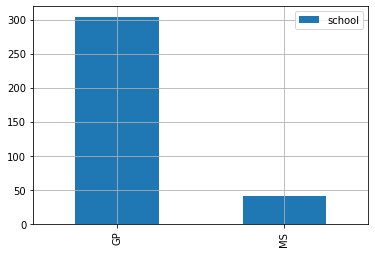

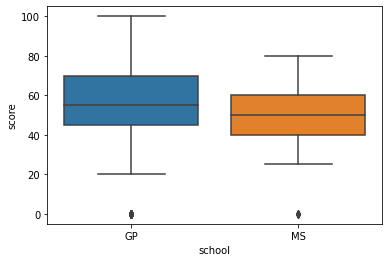

In [89]:
for_obj_col(stud_math['school'])
fig, ax = plt.subplots()
sns.boxplot(x='school', y='score', data=stud_math, ax=ax)

,sex
F,184
M,161


<AxesSubplot:>

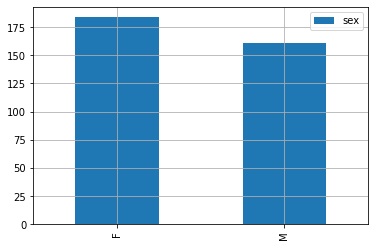

In [59]:
for_obj_col(stud_math['sex'])

,address
U,258
R,73


<AxesSubplot:>

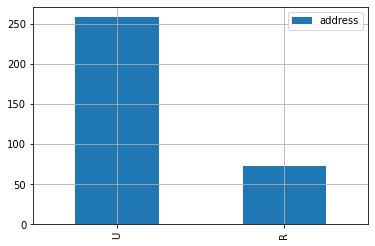

In [60]:
for_obj_col(stud_math['address'])

,famsize
GT3,227
LE3,94


<AxesSubplot:>

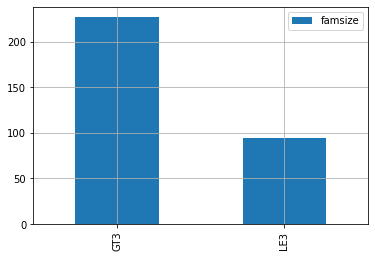

In [61]:
for_obj_col(stud_math['famsize'])

,Pstatus
T,275
A,28


<AxesSubplot:>

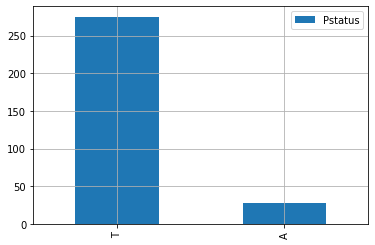

In [62]:
for_obj_col(stud_math['Pstatus'])

,Mjob
other,118
services,82
at_home,53
teacher,45
health,29


<AxesSubplot:>

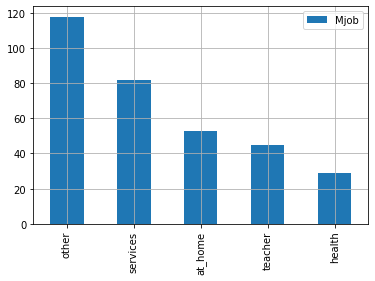

In [63]:
for_obj_col(stud_math['Mjob'])

,Fjob
other,177
services,88
teacher,26
at_home,14
health,11


<AxesSubplot:>

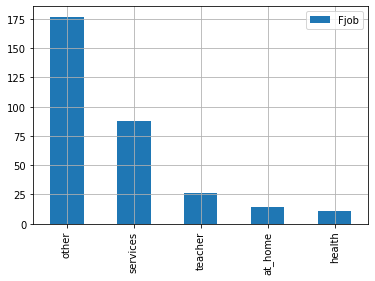

In [64]:
for_obj_col(stud_math['Fjob'])

,reason
course,116
reputation,93
home,90
other,32


<AxesSubplot:>

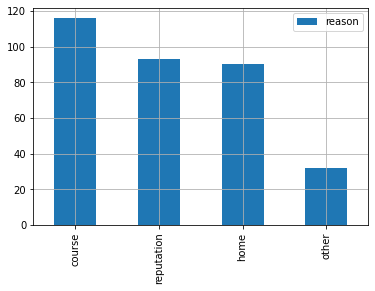

In [65]:
for_obj_col(stud_math['reason'])

,guardian
mother,219
father,72
other,25


<AxesSubplot:>

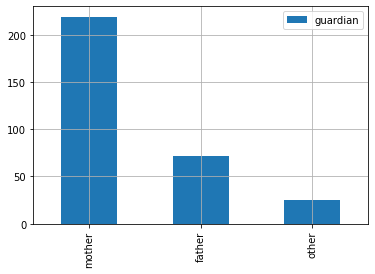

In [66]:
for_obj_col(stud_math['guardian'])

,schoolsup
no,292
yes,44


<AxesSubplot:>

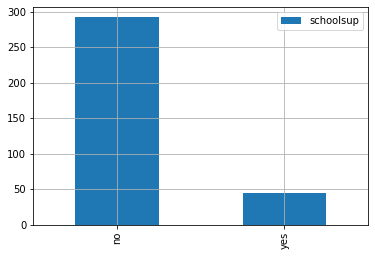

In [67]:
for_obj_col(stud_math['schoolsup'])

,famsup
yes,187
no,124


<AxesSubplot:>

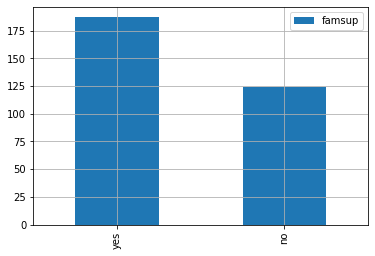

In [68]:
for_obj_col(stud_math['famsup'])

,paid
no,174
yes,136


<AxesSubplot:>

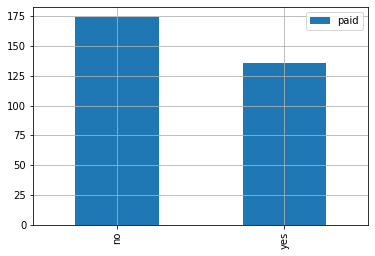

In [69]:
for_obj_col(stud_math['paid'])

,activities
yes,169
no,164


<AxesSubplot:>

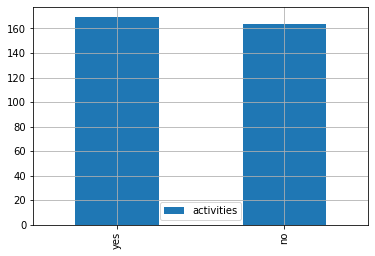

In [70]:
for_obj_col(stud_math['activities'])

,nursery
yes,260
no,69


<AxesSubplot:>

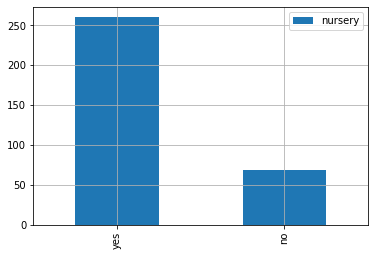

In [71]:
for_obj_col(stud_math['nursery'])

,higher
yes,311
no,17


<AxesSubplot:>

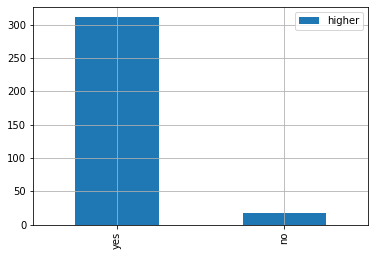

In [72]:
for_obj_col(stud_math['higher'])

,internet
yes,264
no,50


<AxesSubplot:>

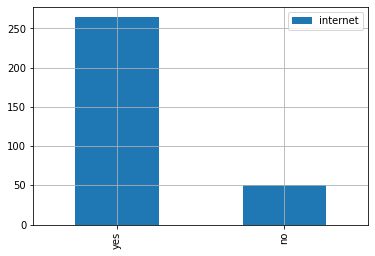

In [73]:
for_obj_col(stud_math['internet'])

,romantic
no,213
yes,106


<AxesSubplot:>

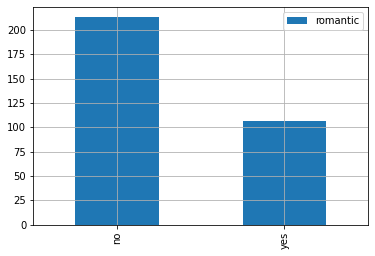

In [74]:
for_obj_col(stud_math['romantic'])

In [ ]:
def boxplt(c):
    fig, ax = plt.subplots()
    sns.boxplot(x=c, y='score', data=stud_math, ax=ax)
    
for col in stud_math.columns:
    boxplt(col)